# **RICE LEAF DISEASE DETECTION**

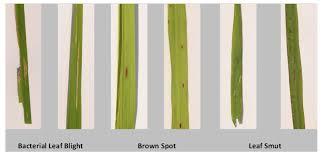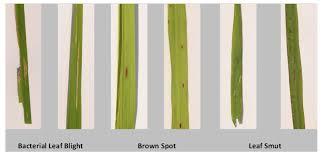

## INRODUCTION: 
Rice is by far the most significant food crop for people in low- and lower-middle-income nations,  out of the three primary crops (rice, wheat, and maize). Although both rich and poor people eat rice in low-income nations, the poorest people consume comparatively little wheat and are thus heavily influenced by rice prices and availability.
- Rice is a vital and often irreplaceable staple in many Asian countries, particularly among the impoverished. Rice accounts for about half of the food expenditures and a fifth of total family expenditures for Asia's extreme poor, who subsist on less than 1.25  per-day_on_average. This group alone spends 62 billion (in purchasing power parity) on rice each year. Rice is vital to the food security of many of the world's impoverished.

## ABOUT DATASET 

- This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

 - [X] Classes<br>
    - [x] Leaf smut
    - [x] Brown spot
    - [x] Bacterial leaf blight

## IMPORT NEEDED LIBRARIES 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.metrics import confusion_matrix

#for fast and memory efficient iterations
import itertools
from sklearn.metrics import classification_report

#to copy the content of the source file to the destination file or directory
import shutil

# to Visualations 
import matplotlib.pyplot as plt
%matplotlib inline

# To Avoid The Warnings
import warnings
warnings.filterwarnings('ignore')

# Advanced Library to enhance the Image processing
import albumentations as albu
from albumentations import Compose, ShiftScaleRotate, Resize


In [2]:
# Creating the Ratio For Image:- ht,wt,image channel(bgr)
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_CHANNELS = 3

In [3]:
#Source Directory(Our Data)
os.listdir('RiceLeaf/')

['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']

### Preparing The Datase
* Creating The Dataframe Containing all the Images
* Creating The 3 List Of Classes

In [4]:
bacterial_leaf_blight_list = os.listdir('RiceLeaf/Bacterial_leaf_blight')
brown_spot_list = os.listdir('RiceLeaf/Brown_spot')
leaf_smut_list = os.listdir('Riceleaf/Leaf_smut')

print(len(bacterial_leaf_blight_list))
print(len(brown_spot_list))
print(len(leaf_smut_list))
print('Successfully Created....!')

40
40
39
Successfully Created....!


 
### Creating the validation sets

In [5]:
df_bacterial_leaf_blight = pd.DataFrame(bacterial_leaf_blight_list, columns=['image'])
df_bacterial_leaf_blight['target'] = 'bacterial_leaf_blight'


df_brown_spot = pd.DataFrame(brown_spot_list, columns=['image'])
df_brown_spot['target'] = 'brown_spot'


df_leaf_smut = pd.DataFrame(leaf_smut_list, columns=['image'])
df_leaf_smut['target'] = 'leaf_smut'



df_leaf_smut_val = df_leaf_smut.sample(n=5, random_state=50)
df_brown_spot_val = df_brown_spot.sample(n=5, random_state=50)
df_bacterial_leaf_blight_val = df_bacterial_leaf_blight.sample(n=5, random_state=50)
# Sample 5 validation images from each class
#We tried with taking diff no.of samples(7,8,10) and random_state(101,70,37,88,etc), 
#we got the best values for accuracy when n=5,random_ste=50

print(len(df_bacterial_leaf_blight_val))
print(len(df_brown_spot_val))
print(len(df_leaf_smut_val))

5
5
5


### CREATING THE TRAINNG SET FOR EACH CLASS 

In [6]:
# get a list of val images
val_list = list(df_bacterial_leaf_blight_val['image'])
# filter out the val images
df_bacterial_leaf_blight_train =df_bacterial_leaf_blight[~df_bacterial_leaf_blight['image'].isin(val_list)] # ~ means notin

In [7]:
# get a list of val images
val_list = list(df_brown_spot_val['image'])
# filter out the val images
df_brown_spot_train = df_brown_spot[~df_brown_spot['image'].isin(val_list)] # ~ means notin

In [8]:
# get a list of val images
val_list = list(df_leaf_smut_val['image'])
# filter out the val images
df_leaf_smut_train = df_leaf_smut[~df_leaf_smut['image'].isin(val_list)] # ~ means notin


print(len(df_bacterial_leaf_blight_train))
print(len(df_brown_spot_train))
print(len(df_leaf_smut_train))

35
35
34


### CREATING THE DATAFRAME FOR "DATA","TRAIN" & "VALIDATION" , BY RESTTING THE INDEX ACCORDINGLY

In [9]:
df_data = pd.concat([ df_bacterial_leaf_blight,df_brown_spot,df_leaf_smut],
                    axis=0).reset_index(drop=True)

df_train = pd.concat([df_bacterial_leaf_blight_train,df_brown_spot_train,df_leaf_smut_train],
                     axis=0).reset_index(drop=True)

df_val = pd.concat([df_bacterial_leaf_blight_val,df_brown_spot_val,df_leaf_smut_val],
                   axis=0).reset_index(drop=True)

In [10]:
#shuffle() is being used for shuffling the batch_sized chunks.It has no effect on steps_per_epoch when it is not NULL.
df_data = shuffle(df_data)
df_train = shuffle(df_train)
df_val = shuffle(df_val)

print("Actual Data :- ",df_data.shape)
print("Training Data: -",df_train.shape)
print("Validation Data :- ",df_val.shape)

Actual Data :-  (119, 2)
Training Data: - (104, 2)
Validation Data :-  (15, 2)


#### CHECKING THE VALUE_COUNTS

In [11]:
pd.DataFrame(df_data['target'].value_counts())

,target
brown_spot,40
bacterial_leaf_blight,40
leaf_smut,39


In [12]:
pd.DataFrame(df_train['target'].value_counts())

,target
brown_spot,35
bacterial_leaf_blight,35
leaf_smut,34


In [13]:
pd.DataFrame(df_val['target'].value_counts())

,target
leaf_smut,5
brown_spot,5
bacterial_leaf_blight,5


## PREPROCESSING THE DATASET
**Transform the target Here we will do one hot encoding to the target classes.**


In [14]:
val_len = len(df_val)
train_len = len(df_train)

df_combined =  pd.concat(objs=[df_val, df_train], axis=0).reset_index(drop=True)


# create the dummy variables

df_combined = pd.get_dummies(df_combined, columns=['target']).reset_index(drop=True)

# separate the train and val sets

val_len = len(df_val)
train_len = len(df_train)

df_val = df_combined[:val_len]
df_train = df_combined[val_len:]


print(df_train.shape)
print(df_val.shape)

(104, 4)
(15, 4)


 ### BASIC CHECKS

In [15]:
df_combined.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
0,DSC_0506.jpg,0,0,1
1,DSC_0333.JPG,0,1,0
2,DSC_0384.JPG,1,0,0
3,DSC_0323.JPG,0,1,0
4,DSC_0402.JPG,1,0,0


In [16]:
df_train.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
15,DSC_0514.jpg,0,0,1
16,DSC_0339.jpg,0,0,1
17,DSC_0322.jpg,0,0,1
18,DSC_0107.jpg,0,1,0
19,DSC_0380.JPG,1,0,0


In [17]:
df_val.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
0,DSC_0506.jpg,0,0,1
1,DSC_0333.JPG,0,1,0
2,DSC_0384.JPG,1,0,0
3,DSC_0323.JPG,0,1,0
4,DSC_0402.JPG,1,0,0


> ####   Saving the dataframes as compressed csv files 
 <b>Note</b><br>
    → These csv files will allow us to use Pandas chunking to feed images into the generators.. <br>  
</div>

In [18]:
df_combined.to_csv('df_combined.csv.gz', compression='gzip', index=False)
df_train.to_csv('df_train.csv.gz', compression='gzip', index=False)
df_val.to_csv('df_val.csv.gz', compression='gzip', index=False)

* Move all images to the same folder

In [20]:
# Create a new directory
image_dir = 'image_dir'
os.mkdir(image_dir)

*  Moving all image to created folders

In [21]:
# Transfer the bacterial_leaf_blight images
for fname in bacterial_leaf_blight_list:
    
    path = 'RiceLeaf\Bacterial_leaf_blight'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [22]:
# Transfer the brown_spot images
for fname in brown_spot_list:
    
    path = 'RiceLeaf\Brown_spot'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [23]:
# Transfer the leaf_smut images
for fname in leaf_smut_list:
    
    path = 'RiceLeaf\Leaf_smut'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

**Checking How many Images Are in The we created the image_dir**

In [24]:
len(os.listdir('image_dir'))

119

## VISUALISATION 
 * Displaying The Images of some Class

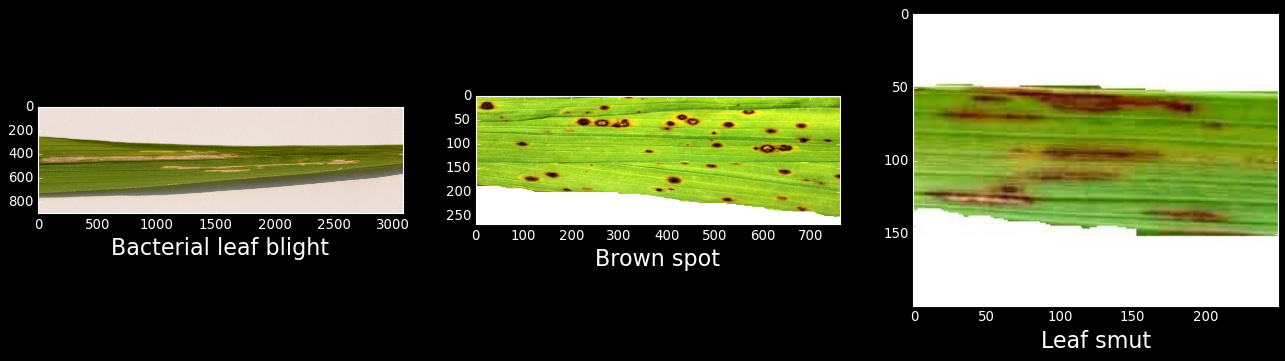

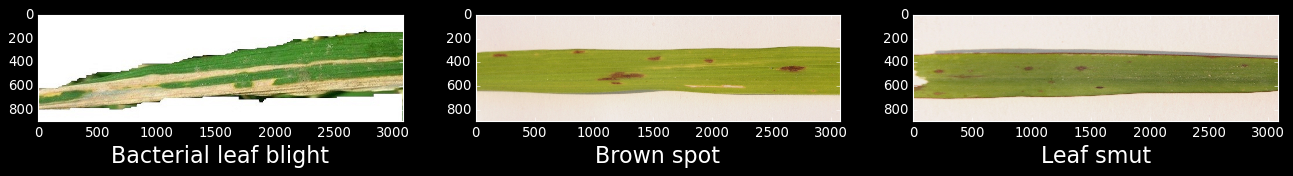

In [57]:
# set up the canvas for the subplots
plt.style.use('dark_background')
plt.figure(figsize=(20,20))

# Image 1
plt.subplot(1,3,1)   # 1 row and 3 columns
item = 'DSC_0402.JPG'
path = 'RiceLeaf\Bacterial_leaf_blight\\' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Bacterial leaf blight', fontsize=20)

# Image 2
plt.subplot(1,3,2)   # 1 row and 3 columns
item = 'DSC_0108.jpg'
path = 'RiceLeaf\Brown_spot\\' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Brown spot', fontsize=20)


# Image 3
plt.subplot(1,3,3)   # 1 row and 3 columns
item = 'DSC_0512.jpg'
path = 'RiceLeaf\Leaf_smut\\' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Leaf smut', fontsize=20)

#------------------------------------------------------------------------------------------------------------------------------#

# set up the canvas for the subplots
plt.figure(figsize=(20,20))

# Image 1
plt.subplot(1,3,1)   # 1 row and 3 columns
item = 'DSC_0702.jpg'
path = 'RiceLeaf\Bacterial_leaf_blight\\' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Bacterial leaf blight', fontsize=20)

# Image 2
plt.subplot(1,3,2)   # 1 row and 3 columns
item = 'DSC_0303.JPG'
path = 'RiceLeaf\Brown_spot\\' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Brown spot', fontsize=20)

# Image 3
plt.subplot(1,3,3)   # 1 row and 3 columns
item = 'DSC_0316.JPG'
path = 'RiceLeaf\Leaf_smut\\' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Leaf smut', fontsize=20)


plt.show()

 ## SETTING UP & TEST THE AUGUMENTATIONS 


In [26]:
def augment_image(augmentation, image):
    
    # get the transform as a dict
    aug_image_dict =  augmentation(image=image)
    # retrieve the augmented matrix of the image
    image_matrix = aug_image_dict['image']
    return image_matrix

####  DEFINING THE TRANSFORM PARAMETER

In [27]:
aug_types = albu.Compose([
            albu.HorizontalFlip(),              #rotating the input by 180 degrees horizontally
             albu.OneOf([
                albu.HorizontalFlip(),
                albu.VerticalFlip(),            #rotating the input by 180 degrees vertically
                ], p=0.8),                      #p=probability of applying the transform.
            albu.OneOf([
                albu.RandomContrast(), 
                albu.RandomGamma(),             #Also used to adjust the degree of contrast within the image for better view. 
                albu.RandomBrightness(),
                ], p=0.3),                     
            albu.OneOf([
                albu.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),  #Transformation of pixels 
                albu.GridDistortion(),                     #image warping technique which makes changes to the grid structure
                albu.OpticalDistortion(distort_limit=2, shift_limit=0.5), # This distort certain elemnts in the image.
                ], p=0.3),
            albu.ShiftScaleRotate()
            ])

 ### GETTING AN IMAGE TO TEST TRANSFORMATIONS 

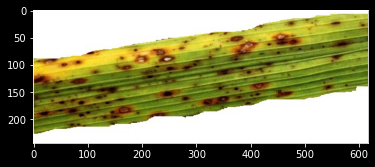

In [28]:
# get a list of train png images
path = 'image_dir/'
image_list = os.listdir('image_dir')

fname = image_list[1]
image_path = path + fname

image = plt.imread(image_path)
plt.imshow(image)
plt.show()

 #### TEST THE TRANSFORMATION  

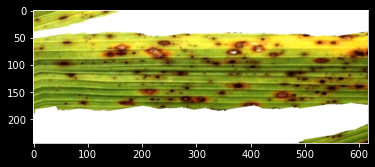

In [29]:
# The image will be different each time this cell is run.
aug_image = augment_image(aug_types, image)
plt.imshow(aug_image)
plt.show()

## BUILDING THE DATA GENERATORS

### TRAIN GENERATOR

###  BUILDING THE FUNCTION

In [31]:
def train_generator(batch_size=8):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_train.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
            

            # Create X_train
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
                
                       
            # Augment the image and mask
            # ===========================

                aug_image = augment_image(aug_types, image)
              
                # insert the image into X_train
                X_train[i] = aug_image
              

            
            
            # Create y_train
            # ===============
                cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
                y_train = df[cols]
                y_train = np.asarray(y_train) 
       
            # Normalize the images
            X_train = X_train/255         
                          
                
           
            yield X_train, y_train

In [32]:
# Test the generator

# initialize
train_gen = train_generator(batch_size=8)

# run the generator
X_train, y_train = next(train_gen)

print(X_train.shape)
print(y_train.shape)

(8, 224, 224, 3)
(8, 3)


 * Train images have been augmented.

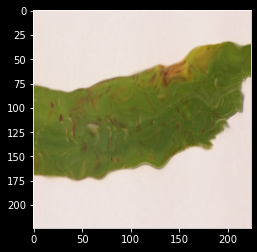

In [33]:
# Print an image in X_train
image = X_train[1,:,:,:]
plt.imshow(image)
plt.show()

### VAL GENERATOR

In [34]:
def val_generator(batch_size=5):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            

        
            
            # Create X_val
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_val[i] = image
                
                
            
            
            # Create y_val
            # ===============

                cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
                y_val = df[cols]
                y_val = np.asarray(y_val)
         
            # Normalize the images
            X_val = X_val/255

            yield X_val, y_val

In [35]:
# Test the generator

# initialize
val_gen = val_generator(batch_size=5)

# run the generator
X_val, y_val = next(val_gen)

print(X_val.shape)
print(y_val.shape)

(5, 224, 224, 3)
(5, 3)


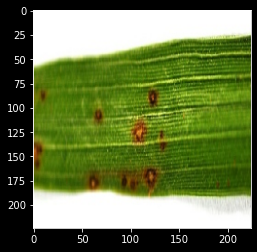

In [36]:
# print an image from X_val
image = X_val[0,:,:,:]
plt.imshow(image)
plt.show()

###  TEST GENERATOR

In [37]:
def test_generator(batch_size=1):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            

        
            
            # Create X_test
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_test[i] = image
                
                 
                
            # Normalize the images
            X_test = X_test/255

            yield X_test

In [38]:
# Test the generator

# initialize
test_gen = test_generator(batch_size=1)

# run the generator
X_test = next(test_gen)

print(X_test.shape)

(1, 224, 224, 3)


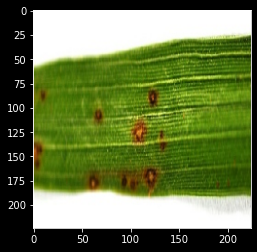

In [39]:
# print an image from X_test
image = X_test[0,:,:,:]
plt.imshow(image)
plt.show()

 ## MODEL BUILDING ARCHITECTURE

In [40]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau, 
                                        ModelCheckpoint,LearningRateScheduler)

In [41]:
from tensorflow.keras.applications.mobilenet import MobileNet
model = MobileNet(weights='imagenet')
x = model.output

# Create a new dense layer for predictions
# 3 corresponds to the number of classes
predictions = Dense(3, activation='softmax')(x)

# inputs=model.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=model.input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

### TRAIN THE MODEL

In [42]:
TRAIN_BATCH_SIZE = 8
VAL_BATCH_SIZE = 5

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = TRAIN_BATCH_SIZE
val_batch_size = VAL_BATCH_SIZE

# determine numtrain steps
train_steps = np.ceil(num_train_samples / train_batch_size)
# determine num val steps
val_steps = np.ceil(num_val_samples / val_batch_size)

In [43]:
# Initialize the generators
train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

model.compile(
    Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)



filepath = "leaf.h5"

#earlystopper = EarlyStopping(patience=10, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,verbose=1, mode='min')

callbacks_list = [checkpoint]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=15, 
                              validation_data=val_gen, validation_steps=val_steps,
                             verbose=1,
                             callbacks=callbacks_list)

Epoch 1/15
13/13 [==============================] - ETA: 0s - loss: 1.0961 - accuracy: 0.4423
Epoch 1: val_accuracy improved from -inf to 0.40000, saving model to leaf.h5
13/13 [==============================] - 16s 946ms/step - loss: 1.0961 - accuracy: 0.4423 - val_loss: 1.0996 - val_accuracy: 0.4000
Epoch 2/15
13/13 [==============================] - ETA: 0s - loss: 1.0868 - accuracy: 0.5962
Epoch 2: val_accuracy improved from 0.40000 to 0.53333, saving model to leaf.h5
13/13 [==============================] - 11s 856ms/step - loss: 1.0868 - accuracy: 0.5962 - val_loss: 1.0856 - val_accuracy: 0.5333
Epoch 3/15
13/13 [==============================] - ETA: 0s - loss: 1.0752 - accuracy: 0.7596
Epoch 3: val_accuracy improved from 0.53333 to 0.60000, saving model to leaf.h5
13/13 [==============================] - 11s 842ms/step - loss: 1.0752 - accuracy: 0.7596 - val_loss: 1.0811 - val_accuracy: 0.6000
Epoch 4/15
13/13 [==============================] - ETA: 0s - loss: 1.0700 - accuracy

### EVALUATE THE MODEL ON THE VAL SET 

In [46]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

### LOADING THE TRAIN MODEL 

In [47]:
model.load_weights('leaf.h5')

val_gen = val_generator(batch_size=1)

val_loss, val_acc =model.evaluate_generator(val_gen,steps=len(df_val))
# Val_gen = 15 steps

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 1.0603946447372437
val_acc: 0.9333333373069763


###  PLOTTING THE CURVES

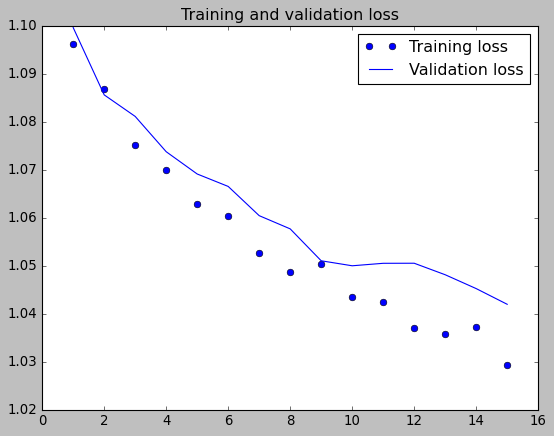

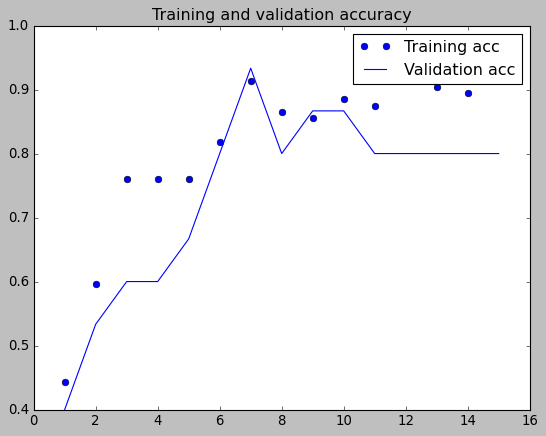

<Figure size 640x480 with 0 Axes>

In [58]:
# display the loss and accuracy curves
plt.style.use('classic')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

#### We can see from the graph that the loss is decreasing and the accuracy is increasing with the increase in the epochs


## MAKE A PREDICTION ON THE VAL SET 

In [59]:
test_gen = test_generator(batch_size=1)

preds = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

15/15 [==============================] - 1s 50ms/step


### GET Y_PRED AS INDEX VALUES

In [60]:
y_pred = np.argmax(preds, axis=1)

y_pred

array([2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2], dtype=int64)

### GET Y_TRUE AS INDEX VALUES

In [61]:
cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
y_true = df_val[cols]
y_true = np.asarray(y_true) 

y_true = np.argmax(y_true, axis=1)

y_true

array([2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2], dtype=int64)

### COMPARE Y_TRUE & Y_PRED 

In [62]:
print(y_pred)
print(y_true)

[2 1 0 1 0 0 2 1 0 0 2 1 1 1 2]
[2 1 0 1 0 0 2 1 0 0 2 2 1 1 2]


## CONFUSION MATRIX & CLASSIFICATION REPORT 

In [63]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true, y_pred)

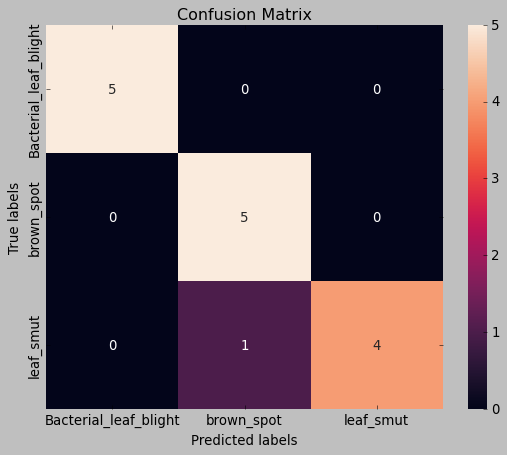

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',ax=ax,xticklabels=['Bacterial_leaf_blight', 'brown_spot', 'leaf_smut'],yticklabels=['Bacterial_leaf_blight', 'brown_spot', 'leaf_smut']); 
#annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set(title='Confusion Matrix',xlabel='Predicted labels',ylabel='True labels');


In [65]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=['bacterial_leaf_blight', 'brown_spot', 'leaf_smut'])

print(report)

                       precision    recall  f1-score   support

bacterial_leaf_blight       1.00      1.00      1.00         5
           brown_spot       0.83      1.00      0.91         5
            leaf_smut       1.00      0.80      0.89         5

             accuracy                           0.93        15
            macro avg       0.94      0.93      0.93        15
         weighted avg       0.94      0.93      0.93        15



####  TESTING OUR MODEL WITH RANDOM PICTURE DOWNLOADED FROM GOOGLE O

1/1 [==============================] - 0s 42ms/step
Source Label : ./google random images downloaded/Bacterial_leaf_blight.jpg
Predicted Label: target_bacterial_leaf_blight


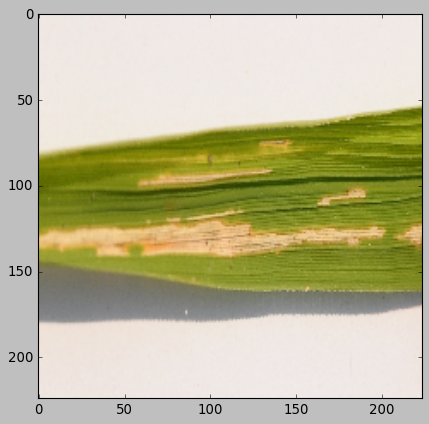

In [70]:
image_name = './google random images downloaded/Bacterial_leaf_blight.jpg'
img = load_img(image_name,target_size=(224,224,3))
img = img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
prob_img = np.argsort(proba[0])[:-4:-1]
print("Source Label :",image_name)
print("Predicted Label: {}".format(cols[prob_img[0]]))
plt.imshow(img)

1/1 [==============================] - 0s 38ms/step
Source Label : ./google random images downloaded/brown_spot1.jpg
Predicted Label: target_brown_spot


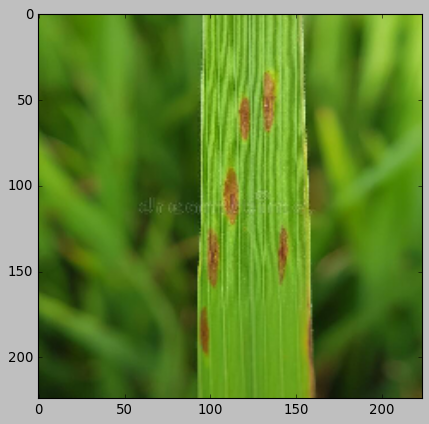

In [79]:
image_name = './google random images downloaded/brown_spot1.jpg'
img = load_img(image_name,target_size=(224,224,3))
img = img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
prob_img = np.argsort(proba[0])[:-4:-1]
print("Source Label :",image_name)
print("Predicted Label: {}".format(cols[prob_img[0]]))
plt.imshow(img)

1/1 [==============================] - 0s 47ms/step
Source Label : ./google random images downloaded/leaf_sumt.jpg
Predicted Label: target_leaf_smut


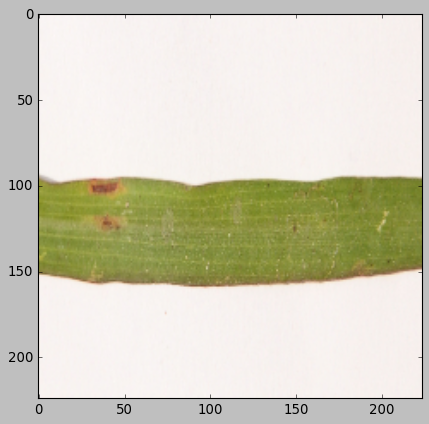

In [78]:
image_name = './google random images downloaded/leaf_sumt.jpg'
img = load_img(image_name,target_size=(224,224,3))
img = img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
prob_img = np.argsort(proba[0])[:-4:-1]
print("Source Label :",image_name)
print("Predicted Label: {}".format(cols[prob_img[0]]))
plt.imshow(img)

## CONCLUSION:

- [x]  We have used 25 images from bacterial blight,brown spot class and 24 from leaf smut class for training (104 training images)
- [x] We have used 5 images from each class for validation (15 validation images)
- [x] Created an image directory
- [x] Fine tuned a MobileNet model that was pre-trained on imagenet.
- [x] Used Adam optimizer, categorical crossentropy loss and a constant learning rate of 0.0001
- [x] We have used callbacks such as EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,LearningRateScheduler                      
- [x] We didn't use the pre-processing method that was applied to the imagenet images that were used to pre-train Mobilenet. Instead   we normalized all images by dividing by 255.
- [x] Performed image augmentation using the Albumentations library. Image augmentation helped to reduce overfitting, improved our    model performance and helped the model to generalize better.
- [x] We predicted the random images from Google to check the working of our model